<a href="https://colab.research.google.com/github/OsReyesM/Jugadores_Forbes-1990-2020/blob/main/Jugadores_Practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   ANÁLISIS DE LOS DEPORTISTAS MÁS IMPORTANTES DE 1990 A 2020 SEGÚN FORBES

In [328]:
import numpy as np
import pandas as pd
from datetime import datetime


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
#import pycountry
import folium
from folium import plugins


import numpy as np
from PIL import Image


import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Graphics in retina format
%config InlineBackend.figure_format = 'retina'

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5


# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')
import os

In [329]:
df = pd.read_csv('https://raw.githubusercontent.com/OsReyesM/Jugadores_Forbes-1990-2020/main/Atletas%20m%C3%A1s%20ricos%20Forbes(1990-2020).csv')
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


EXPLORANDO DATOS:

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [331]:
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [332]:
df.nunique()

S.NO                    301
Name                     82
Nationality              22
Current Rank             10
Previous Year Rank       36
Sport                    29
Year                     30
earnings ($ million)    198
dtype: int64

In [333]:
# CREANDO COPIA DEL DATA FRAME

jugForbes = df.copy()
jugForbes.drop('S.NO',axis=1,inplace=True)
jugForbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [334]:
jugForbes

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...
296,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,Tiger Woods,USA,8,11,Golf,2020,62.3
299,Kirk Cousins,USA,9,>100,American Football,2020,60.5


FORMATEANDO LA TABLA

In [335]:
# CONVERTIR COLUMNA 'YEAR' A FORMATO DATETIME
jugForbes['Year'] = jugForbes['Year'].apply(pd.to_datetime,format='%Y')

#DEFINIR LA COLUMNA AÑO CONO INDICE
jugForbes['year'] = pd.DatetimeIndex(jugForbes['Year']).year
jugForbes.set_index('year', inplace=True)
jugForbes.drop('Year',axis=1,inplace=True)

# CONVERTIR A MAYÚSCULAS LOS VALORES DE LA COLUMNA 'SPORT', 'NAME' Y 'NATIONALITY'
jugForbes['Sport'] = jugForbes['Sport'].str.upper()
jugForbes["Name"]=jugForbes["Name"].str.upper()
jugForbes["Nationality"]=jugForbes["Nationality"].str.upper()

jugForbes.head()


,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,MIKE TYSON,USA,1,NaN,BOXING,28.6
1990,BUSTER DOUGLAS,USA,2,NaN,BOXING,26.0
1990,SUGAR RAY LEONARD,USA,3,NaN,BOXING,13.0
1990,AYRTON SENNA,BRAZIL,4,NaN,AUTO RACING,10.0
1990,ALAIN PROST,FRANCE,5,NaN,AUTO RACING,9.0


In [336]:
jugForbes["Sport"].unique()

array(['BOXING', 'AUTO RACING', 'GOLF', 'BASKETBALL', 'TENNIS', 'NFL',
       'NBA', 'BASEBALL', 'ICE HOCKEY', 'AMERICAN FOOTBALL / BASEBALL',
       'F1 MOTORSPORTS', 'NASCAR', 'HOCKEY', 'AUTO RACING (NASCAR)',
       'F1 RACING', 'AMERICAN FOOTBALL', 'SOCCER', 'CYCLING',
       'MOTORCYCLE GP', 'MMA'], dtype=object)

In [337]:
# CAMBIANDO LOS NOMBRES DE VALORES EN LA COLUMNA 'SPORT'
jugForbes["Sport"]= jugForbes["Sport"].apply(lambda x: x.replace("NBA","BASKETBALL"))
jugForbes["Sport"]= jugForbes["Sport"].apply(lambda x: x.replace("AUTO RACING (NASCAR)","NASCAR"))
jugForbes["Sport"]= jugForbes["Sport"].apply(lambda x: x.replace("NFL","AMERICAN FOOTBALL"))
jugForbes["Sport"]= jugForbes["Sport"].apply(lambda x: x.replace("ICE HOCKEY","HOCKEY"))
jugForbes["Sport"]= jugForbes["Sport"].apply(lambda x: x.replace("AMERICAN FOOTBALL / BASEBALL","AMERICAN FOOTBALL"))
jugForbes["Sport"]= jugForbes["Sport"].apply(lambda x: x.replace("AUTO RACING","F1 RACING"))
jugForbes["Sport"]= jugForbes["Sport"].apply(lambda x: x.replace("F1 MOTORSPORTS","F1 RACING"))

jugForbes["Sport"].unique()

array(['BOXING', 'F1 RACING', 'GOLF', 'BASKETBALL', 'TENNIS',
       'AMERICAN FOOTBALL', 'BASEBALL', 'HOCKEY', 'NASCAR', 'SOCCER',
       'CYCLING', 'MOTORCYCLE GP', 'MMA'], dtype=object)

CAMBIANDO LOS VALORES ÚNICOS DE LA COLUMNA 'PREVIOUS YEAR RANK'

In [338]:
jugForbes['Previous Year Rank'].unique()

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

In [339]:
jugForbes["Previous Year Rank"][jugForbes["Previous Year Rank"]=="not ranked"]=0
jugForbes["Previous Year Rank"][jugForbes["Previous Year Rank"]=="??"]=0
jugForbes["Previous Year Rank"][jugForbes["Previous Year Rank"]=="?"]=0
jugForbes["Previous Year Rank"][jugForbes["Previous Year Rank"]==">30"]=31
jugForbes["Previous Year Rank"][jugForbes["Previous Year Rank"]==">40"]=41
jugForbes["Previous Year Rank"][jugForbes["Previous Year Rank"]==">10"]=11
jugForbes["Previous Year Rank"][jugForbes["Previous Year Rank"]==">20"]=21
jugForbes["Previous Year Rank"][jugForbes["Previous Year Rank"]==">14"]=15
jugForbes["Previous Year Rank"][jugForbes["Previous Year Rank"]==">100"]=101
jugForbes["Previous Year Rank"][jugForbes["Previous Year Rank"]=="none"]=0

In [340]:
jugForbes['Previous Year Rank'].unique()

array([nan, '8', '1', 31, '4', '5', '12', '6', '3', '9', '17', '13', '10',
       41, '19', '40', '7', '11', '30', '22', '20', 0, '38', '2', '15',
       '14', '26', '18', 11, 21, '24', '21', 15, 101], dtype=object)

LLENANDO VALORES NULOS

In [341]:
jugForbes["Previous Year Rank"].fillna(0, inplace=True)

In [342]:
jugForbes

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,MIKE TYSON,USA,1,0,BOXING,28.6
1990,BUSTER DOUGLAS,USA,2,0,BOXING,26.0
1990,SUGAR RAY LEONARD,USA,3,0,BOXING,13.0
1990,AYRTON SENNA,BRAZIL,4,0,F1 RACING,10.0
1990,ALAIN PROST,FRANCE,5,0,F1 RACING,9.0
...,...,...,...,...,...,...
2020,STEPHEN CURRY,USA,6,9,BASKETBALL,74.4
2020,KEVIN DURANT,USA,7,10,BASKETBALL,63.9
2020,TIGER WOODS,USA,8,11,GOLF,62.3


MÁS FORMATEOS

In [343]:
jugForbes["Name"]=jugForbes["Name"].apply(lambda x: x.replace("AARON ROGERS","AARON RODGERS"))
jugForbes["Nationality"]=jugForbes["Nationality"].apply(lambda x: x.replace("PHILIPPINES","FILIPINO"))
jugForbes["Previous Year Rank"]=jugForbes["Previous Year Rank"].astype('int64')

## 1.- Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

In [344]:
f =jugForbes[(jugForbes.index >= 2010) & (jugForbes.index <= 2020) & (jugForbes['Current Rank'] <= jugForbes['Previous Year Rank'] -2)]

f2 =f[f['Current Rank'] == f['Previous Year Rank'] - 2]

f2

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
2010,PHIL MICKELSON,USA,4,6,GOLF,46.0
2010,ELI MANNING,USA,9,11,AMERICAN FOOTBALL,39.9
2011,ROGER FEDERER,SWITZERLAND,4,6,TENNIS,47.0
2013,TIGER WOODS,USA,1,3,GOLF,78.1
2015,ROGER FEDERER,SWITZERLAND,5,7,TENNIS,67.0
2016,CRISTIANO RONALDO,PORTUGAL,1,3,SOCCER,88.0
2016,LIONEL MESSI,ARGENTINA,2,4,SOCCER,81.4
2016,KEVIN DURANT,USA,5,7,BASKETBALL,56.2
2019,NEYMAR,BRAZIL,3,5,SOCCER,105.0


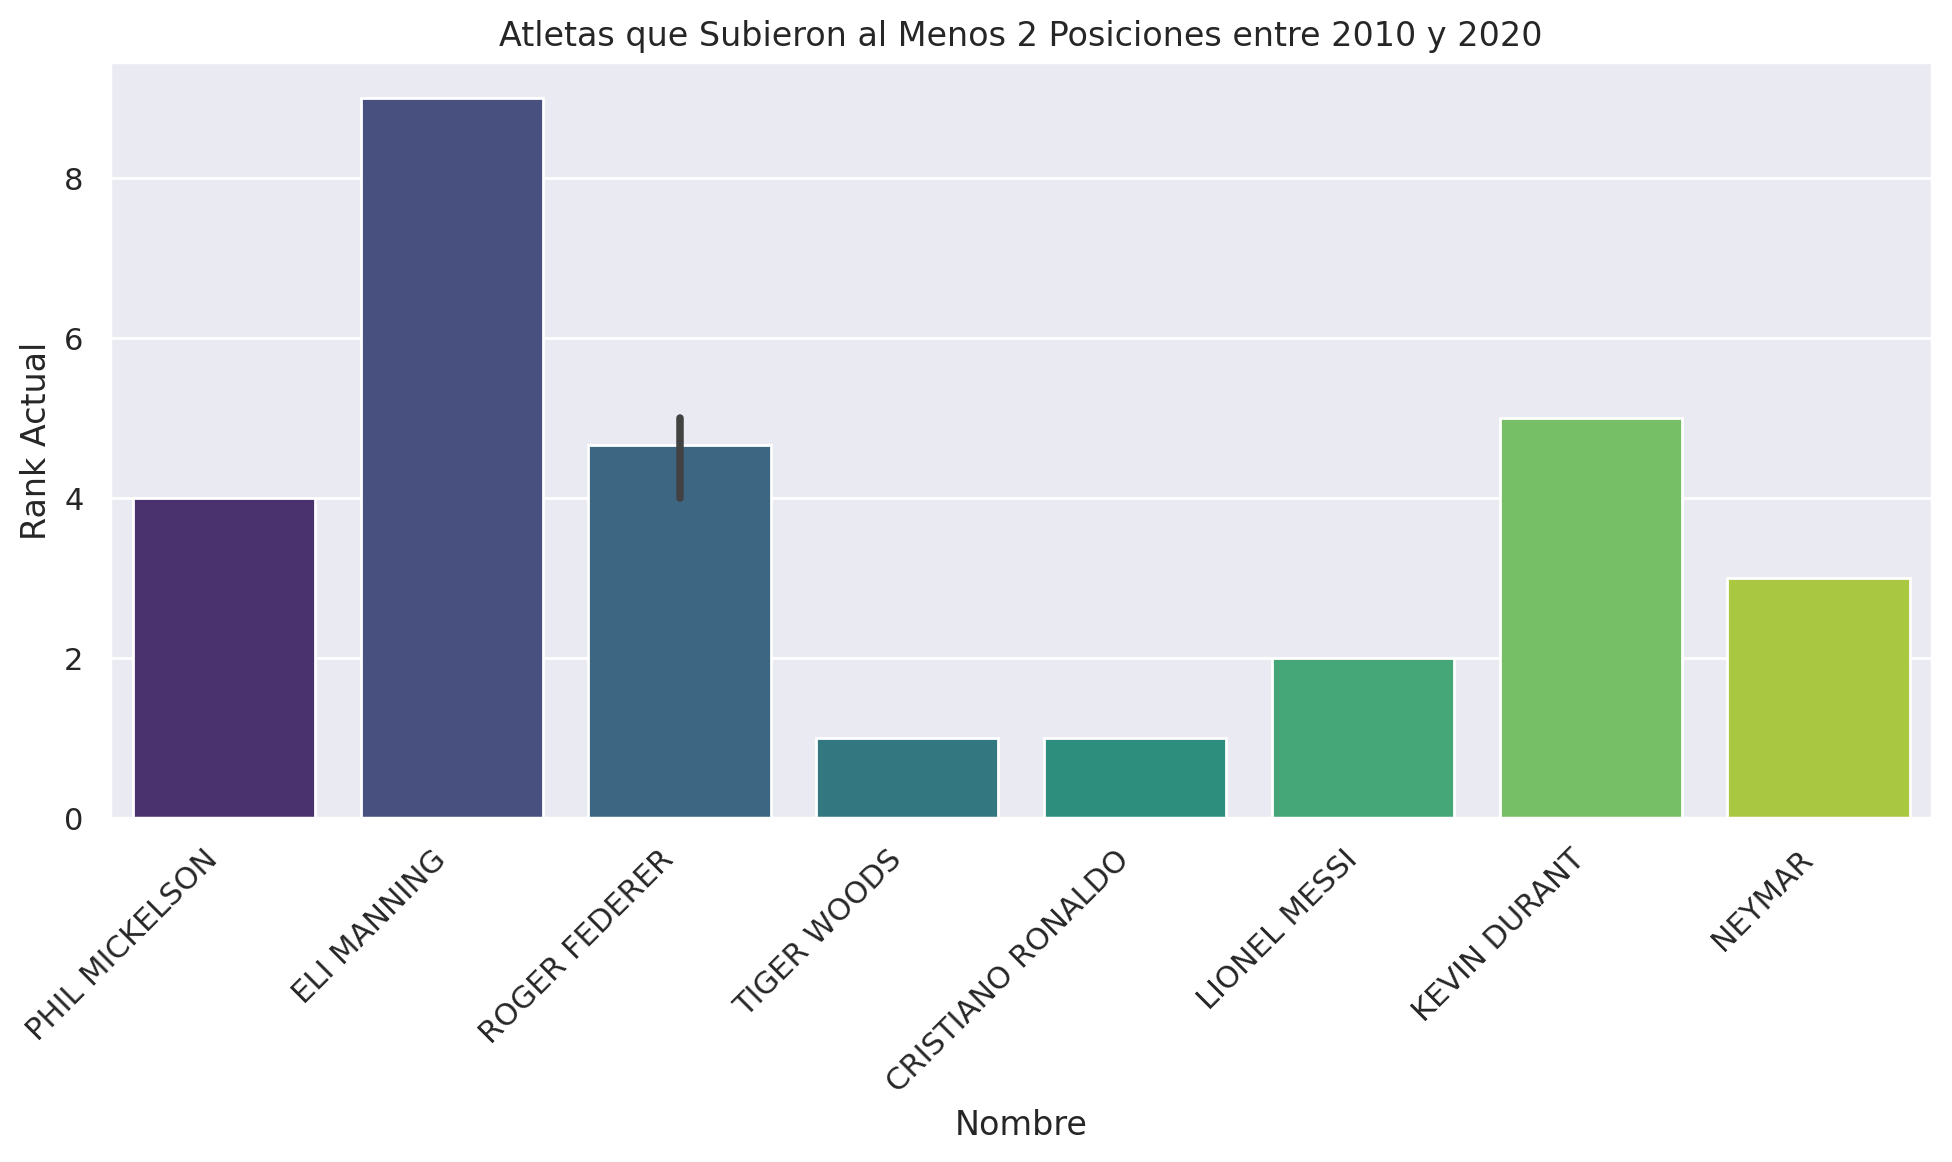

In [345]:
# Crear una gráfica de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Current Rank', data=f2, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nombre')
plt.ylabel('Rank Actual')
plt.title('Atletas que Subieron al Menos 2 Posiciones entre 2010 y 2020')
plt.tight_layout()
plt.show()

OTRA RESPUESTA, PERO AHORA CON UN ATLETA POR AÑO DESDE 2010 A 2020

In [346]:
f3 =jugForbes[(jugForbes.index >= 2010) & (jugForbes.index <= 2020) & (jugForbes['Current Rank'] <= jugForbes['Previous Year Rank'] -2)]
f3 = f.drop_duplicates(subset='Name')
#f2 =f[f['Current Rank'] == f['Previous Year Rank']]

f3 = f3.groupby(f3.index).first()

In [347]:
f3

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
2010,FLOYD MAYWEATHER,USA,2,11,BOXING,65.0
2011,LEBRON JAMES,USA,3,7,BASKETBALL,48.0
2012,MANNY PACQUIAO,FILIPINO,2,24,BOXING,62.0
2013,TIGER WOODS,USA,1,3,GOLF,78.1
2014,RAFAEL NADAL,SPAIN,9,15,TENNIS,44.5
2015,KEVIN DURANT,USA,7,20,BASKETBALL,54.2
2016,NOVAK DJOKOVIC,SERBIA,6,13,TENNIS,55.8
2017,RORY MCILROY,NORTHERN IRELAND,6,17,GOLF,50.0
2018,CONOR MCGREGOR,IRELAND,4,24,MMA,99.0


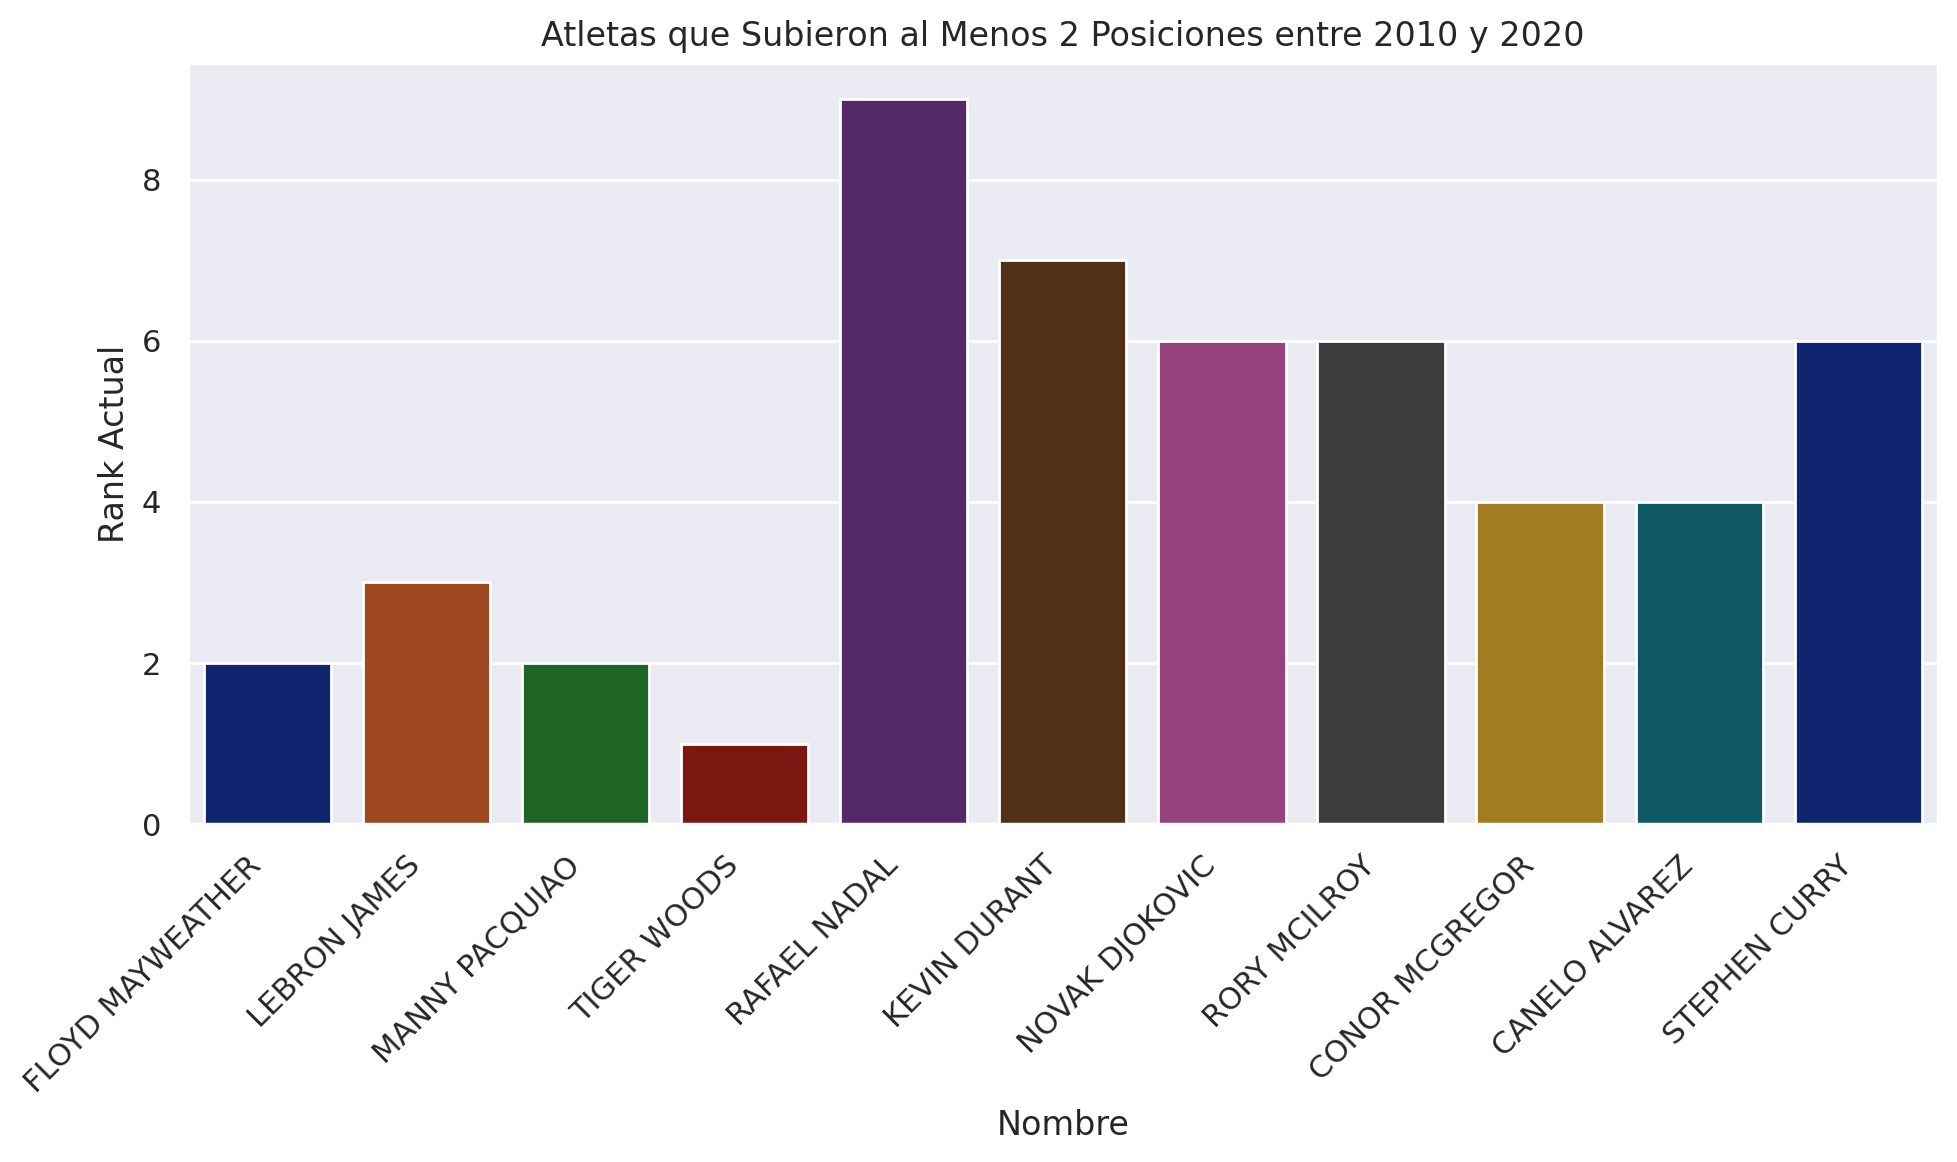

In [348]:
# Crear una gráfica de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Current Rank', data=f3, palette='dark')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nombre')
plt.ylabel('Rank Actual')
plt.title('Atletas que Subieron al Menos 2 Posiciones entre 2010 y 2020')
plt.tight_layout()
plt.show()

## 2.- Atleta con el menor número de apariciones y mayores ganancias.

In [349]:
# HACEMOS UN CONTEO DE LAS VECES QUE APARECE CADA ATLETA EN EL DATAFRAME
nombres = jugForbes['Name'].value_counts()

# FILTRAMOS SOBRE LA PRIMER VARIABLE 'nombres' PARA QUE MUESTRE UNA LISTA DE LOS ATLETAS CON EL MENOR NÚMERO DE APARICIONES
menorFrec = nombres[nombres == 1].index.tolist()


# DEFINIMOS UN ÚLTIMO FILTRO QUE FUNCIONE SOBRE EL DATASET, MOSTRANDO LOS NOMBRES Y GANANCIA DE AQUELLOS ATLETAS CON MENORES APARICIONES
# Y ORDENÁNDOLOS SEGÚN LA MAYOR GANANCIA

filt= jugForbes[jugForbes['Name'].isin(menorFrec)].groupby('Name')['earnings ($ million)'].max().sort_values(ascending= False).to_frame()

In [350]:

filt = filt.reset_index()

filt10 = filt.head(10)

filt10

,Name,earnings ($ million)
0,CONOR MCGREGOR,99.0
1,CANELO ALVAREZ,94.0
2,RUSSELL WILSON,89.5
3,KIRK COUSINS,60.5
4,MATTHEW STAFFORD,59.5
5,CARSON WENTZ,59.1
6,NOVAK DJOKOVIC,55.8
7,MUHAMMAD ALI,55.0
8,CAM NEWTON,53.1
9,JORDAN SPIETH,52.8


GRAFICANDO LA TABLA ANTERIOR

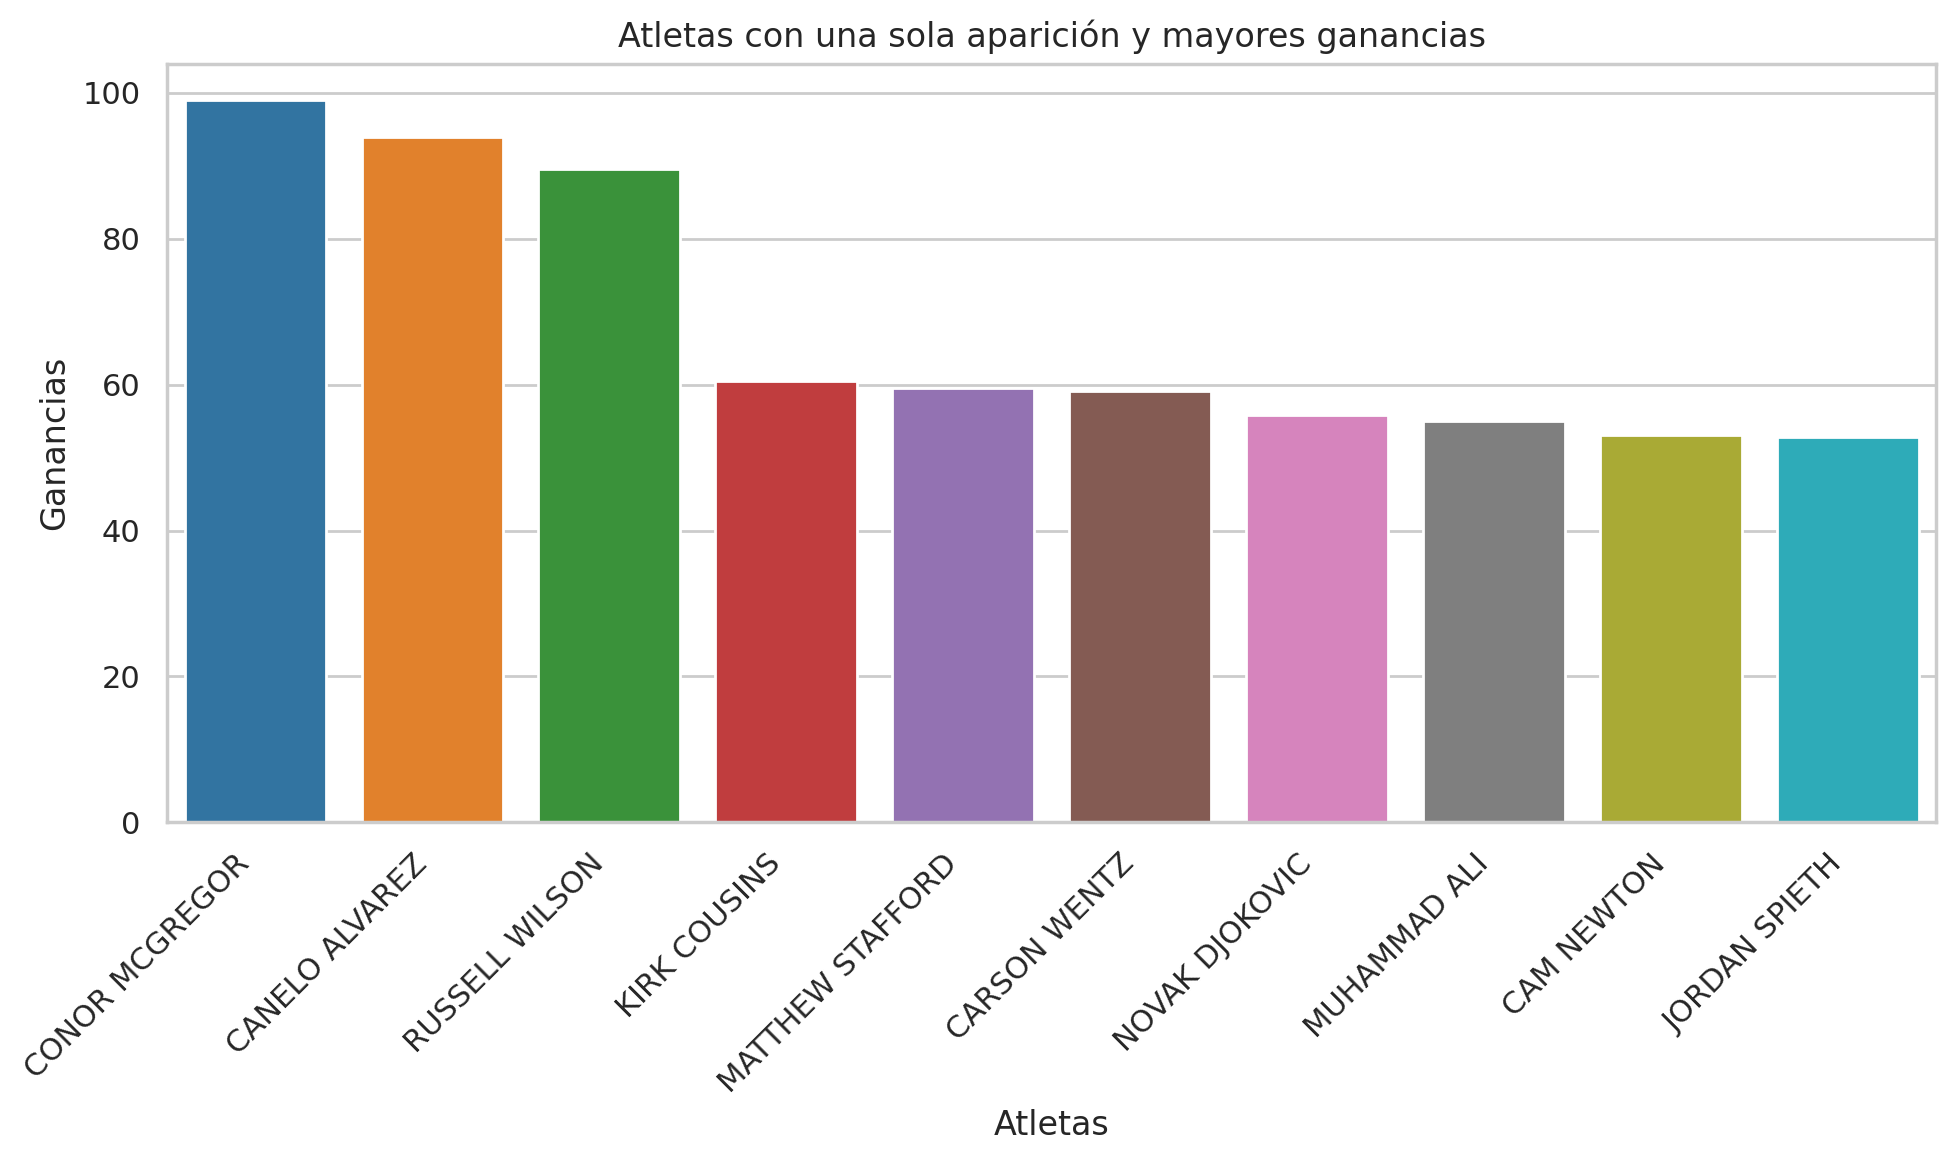

In [351]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Name', y='earnings ($ million)', data=filt10,  palette="tab10")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Atletas')
plt.ylabel('Ganancias')
plt.title('Atletas con una sola aparición y mayores ganancias')
plt.tight_layout()
plt.show()

## 3.- Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.

In [352]:
# FILTRAR DATAFRAME PARA MOSTRAR TODOS LOS DEPORTISTAS FUERA DEL RANKEO TOP 10
fueraRank = jugForbes[(jugForbes['Previous Year Rank'] >10)]

# AGRUPAR POR PAÍS Y DEPORTE, SUMANDO GANANCIAS
paisDeporte = fueraRank.groupby(['Nationality','Sport'])['earnings ($ million)'].sum()

# PAÍS Y DEPORTE CON MAYOR NÚMERO DE GANANCIAS (USA, BOXING)
pais_deporte_max_ganancias = paisDeporte.idxmax()
print(f"El país con mayor número de ganancias fue: {pais_deporte_max_ganancias[0]} y el deporte: {pais_deporte_max_ganancias[1]}\n\n\n")
# Filtrar el DataFrame para el país y deporte con mayores ganancias

final_df = fueraRank[(fueraRank['Nationality'] == pais_deporte_max_ganancias[0]) & (fueraRank['Sport'] == pais_deporte_max_ganancias[1])]

maxGan = final_df.sort_values(by= 'earnings ($ million)', ascending = False).drop_duplicates(subset = 'Name')

print('       TABLA CON LOS DEPORTISTAS FUERA DEL RANKING DEL PAÍS Y DEPORTE CON MAYORES GANANCIAS:\n')
maxGan

El país con mayor número de ganancias fue: USA y el deporte: BOXING



       TABLA CON LOS DEPORTISTAS FUERA DEL RANKING DEL PAÍS Y DEPORTE CON MAYORES GANANCIAS:



,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
2018,FLOYD MAYWEATHER,USA,1,101,BOXING,285.0
2006,MUHAMMAD ALI,USA,3,11,BOXING,55.0
2007,OSCAR DE LA HOYA,USA,2,11,BOXING,43.0
1999,EVANDER HOLYFIELD,USA,5,11,BOXING,35.5
1999,MIKE TYSON,USA,6,11,BOXING,33.0
1999,LENNOX LEWIS,USA,8,11,BOXING,29.0
1993,RIDDICK BOWE,USA,2,41,BOXING,25.0
1995,GEORGE FOREMAN,USA,6,15,BOXING,18.0
1994,MICHAEL MOORER,USA,7,41,BOXING,12.1


## 4.- País con mayor número de deportes con atletas en el dataset.

In [353]:


paisAtletas = jugForbes.groupby(['Nationality','Sport'])['Sport'].count().reset_index(name='Total_Deportistas')

paisAtletas =  paisAtletas[paisAtletas['Nationality'] == 'USA'].groupby('Nationality')['Total_Deportistas'].sum()


print("EL PAÍS CON MAYOR NÚMERO DE DEPORTISTAS ES:\n\n", paisAtletas)

EL PAÍS CON MAYOR NÚMERO DE DEPORTISTAS ES:

 Nationality
USA    206
Name: Total_Deportistas, dtype: int64


## 5.- ¿Cuántos atletas por deporte tiene cada país?

In [354]:


atPais = jugForbes.groupby(['Nationality', 'Sport'])['Sport'].count().reset_index(name='Cantidad_Atletas')

atPais = atPais.groupby('Sport')['Cantidad_Atletas'].sum().sort_values(ascending = False).to_frame()
atPais

,Cantidad_Atletas
Sport,
BASKETBALL,82
BOXING,46
GOLF,44
SOCCER,33
F1 RACING,31
TENNIS,23
AMERICAN FOOTBALL,21
BASEBALL,6
NASCAR,5


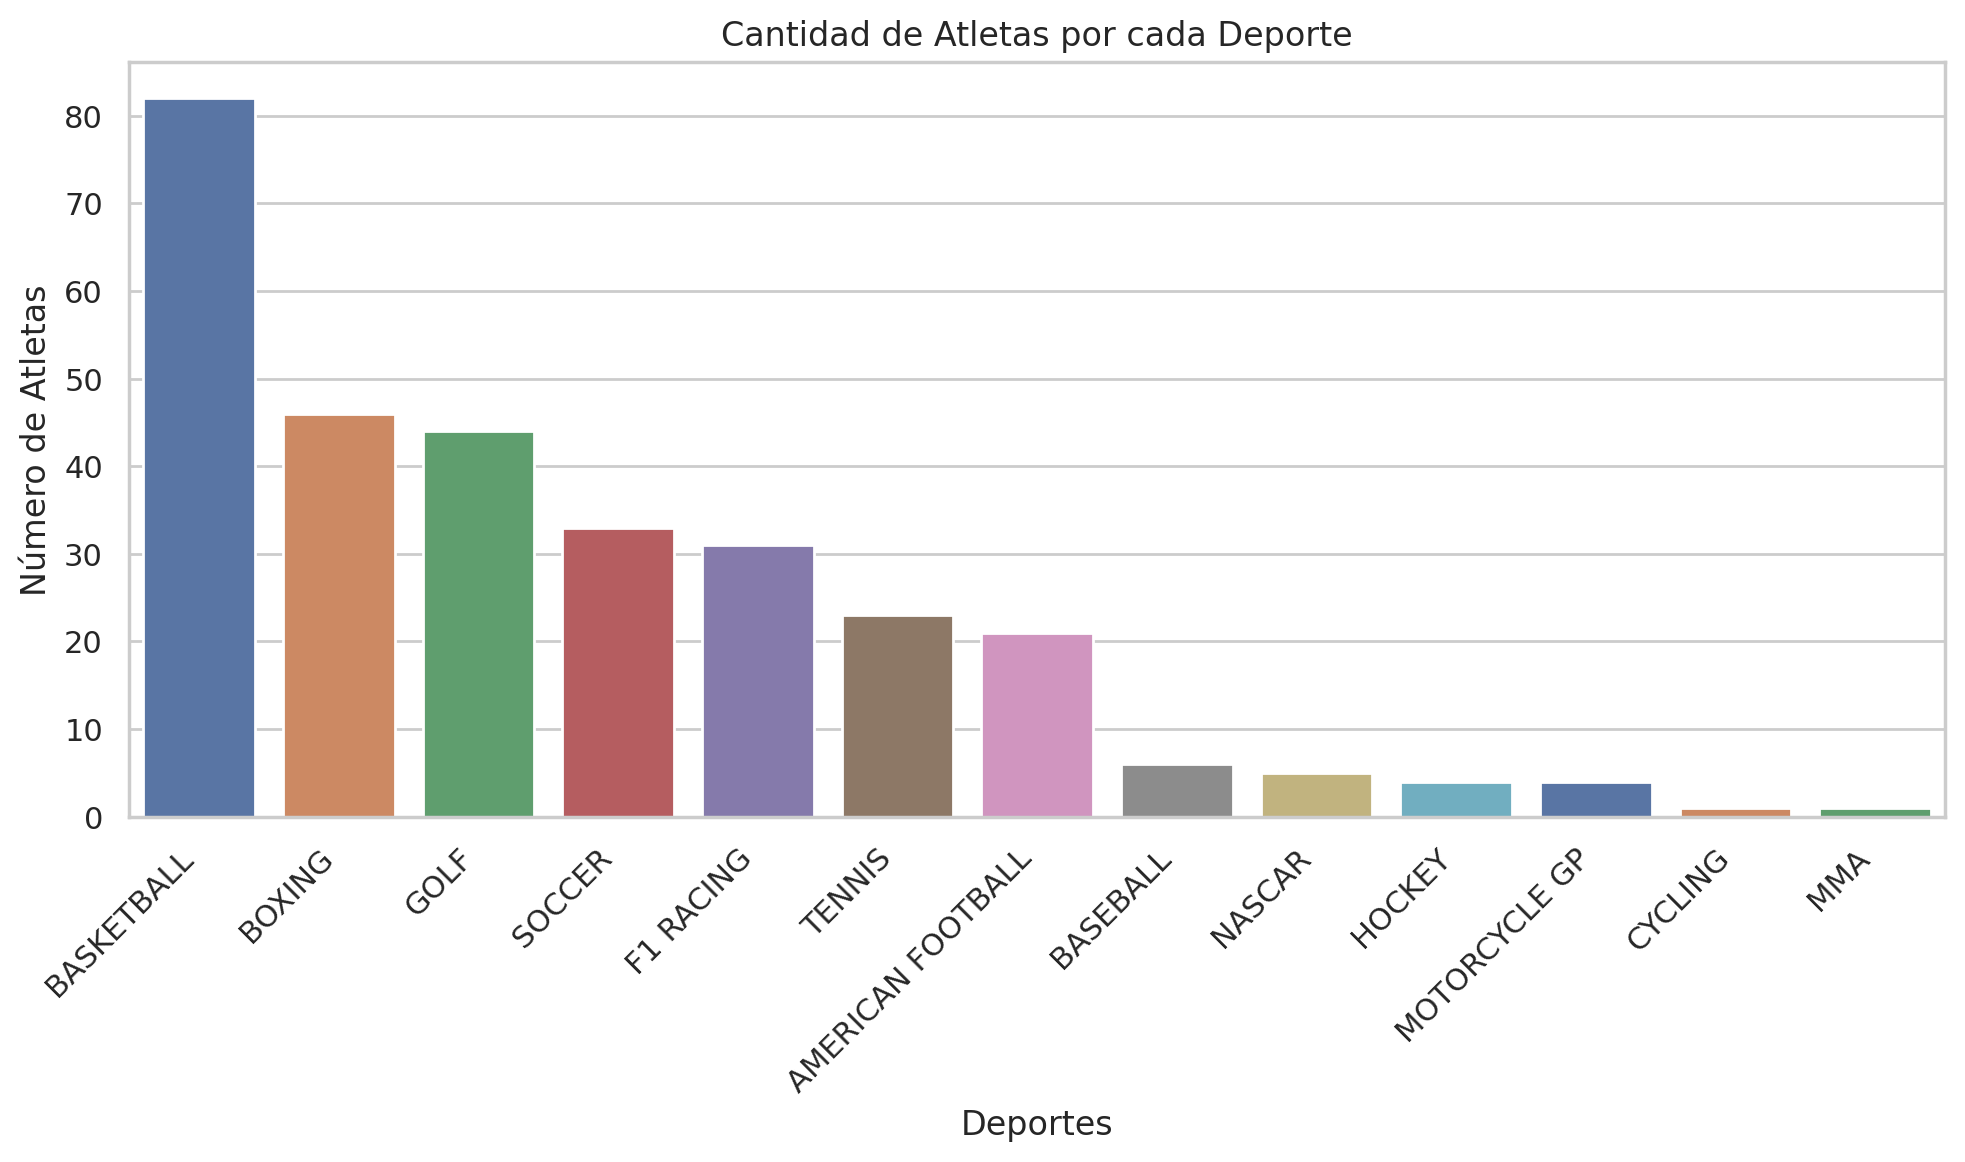

In [355]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=atPais.index, y='Cantidad_Atletas', data=atPais,  palette="deep")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Deportes')
plt.ylabel('Número de Atletas')
plt.title('Cantidad de Atletas por cada Deporte')
plt.tight_layout()
plt.show()

## 6.- Ganancia mínima y máxima (dentro del dataset) por deporte y por país.

GANANCIA MÍNIMA Y MÁXIMA POR DEPORTE

In [356]:
max_sport_total_earnings = jugForbes.groupby('Sport')['earnings ($ million)'].max().to_frame().reset_index()
max_sport_total_earnings.rename(columns={'earnings ($ million)':'Max earnings ($ million)'}, inplace=True)

min_sport_total_earnings = jugForbes.groupby('Sport')['earnings ($ million)'].min().to_frame().reset_index()
min_sport_total_earnings.rename(columns={'earnings ($ million)':'Min earnings ($ million)'}, inplace=True)

compare_sport_total_earnings = min_sport_total_earnings.merge(max_sport_total_earnings, on='Sport')
compare_sport_total_earnings

,Sport,Min earnings ($ million),Max earnings ($ million)
0,AMERICAN FOOTBALL,9.5,89.5
1,BASEBALL,12.7,35.0
2,BASKETBALL,8.1,89.0
3,BOXING,8.1,300.0
4,CYCLING,28.0,28.0
5,F1 RACING,9.0,80.0
6,GOLF,8.1,115.0
7,HOCKEY,13.5,29.8
8,MMA,99.0,99.0
9,MOTORCYCLE GP,28.0,35.0


GANANCIA MÍNIMA Y MÁXIMA POR PAÍS

In [357]:
max_national_total_earnings = jugForbes.groupby('Nationality')['earnings ($ million)'].max().to_frame().reset_index()
max_national_total_earnings.rename(columns={'earnings ($ million)':'Max earnings ($ million)'}, inplace=True)

min_national_total_earnings = jugForbes.groupby('Nationality')['earnings ($ million)'].min().to_frame().reset_index()
min_national_total_earnings.rename(columns={'earnings ($ million)':'Min earnings ($ million)'}, inplace=True)

compare_national_total_earnings = min_national_total_earnings.merge(max_national_total_earnings, on='Nationality')
compare_national_total_earnings

,Nationality,Min earnings ($ million),Max earnings ($ million)
0,ARGENTINA,32.3,127.0
1,AUSTRALIA,8.5,8.5
2,AUSTRIA,13.5,13.5
3,BRAZIL,10.0,105.0
4,CANADA,10.2,23.0
5,DOMINICAN,35.0,35.0
6,FILIPINO,40.0,160.0
7,FINLAND,40.0,45.0
8,FRANCE,9.0,16.0
9,GERMANY,15.0,80.0


## 7.- Atleta con mayores ganancias por deporte por década

In [498]:
ganDecada = jugForbes.reset_index()

In [499]:
ganDecada

,year,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
0,1990,MIKE TYSON,USA,1,0,BOXING,28.6
1,1990,BUSTER DOUGLAS,USA,2,0,BOXING,26.0
2,1990,SUGAR RAY LEONARD,USA,3,0,BOXING,13.0
3,1990,AYRTON SENNA,BRAZIL,4,0,F1 RACING,10.0
4,1990,ALAIN PROST,FRANCE,5,0,F1 RACING,9.0
...,...,...,...,...,...,...,...
296,2020,STEPHEN CURRY,USA,6,9,BASKETBALL,74.4
297,2020,KEVIN DURANT,USA,7,10,BASKETBALL,63.9
298,2020,TIGER WOODS,USA,8,11,GOLF,62.3
299,2020,KIRK COUSINS,USA,9,101,AMERICAN FOOTBALL,60.5


In [500]:
# CREAR Y CONVERTIR COLUMNA 'YEAR' A FORMATO DATETIME
ganDecada['year'] = pd.to_datetime(ganDecada['year'], format='%Y')
ganDecada.set_index('year', inplace=True)



In [501]:
# RESAMPLEANDO EL DATAFRAME POR DÉCADA Y APLICANDO FUNCIONES AGREGADAS A LAS COLUMNAS 'NAME' Y 'EARNINGS'

result = ganDecada[['Name','earnings ($ million)']].resample('10Y').agg({'Name':'first',
                                                       'earnings ($ million)':'max'})

result.index = result.index.year

result

,Name,earnings ($ million)
year,,
1990,MIKE TYSON,28.6
2000,EVANDER HOLYFIELD,78.3
2010,TIGER WOODS,115.0
2020,TIGER WOODS,300.0


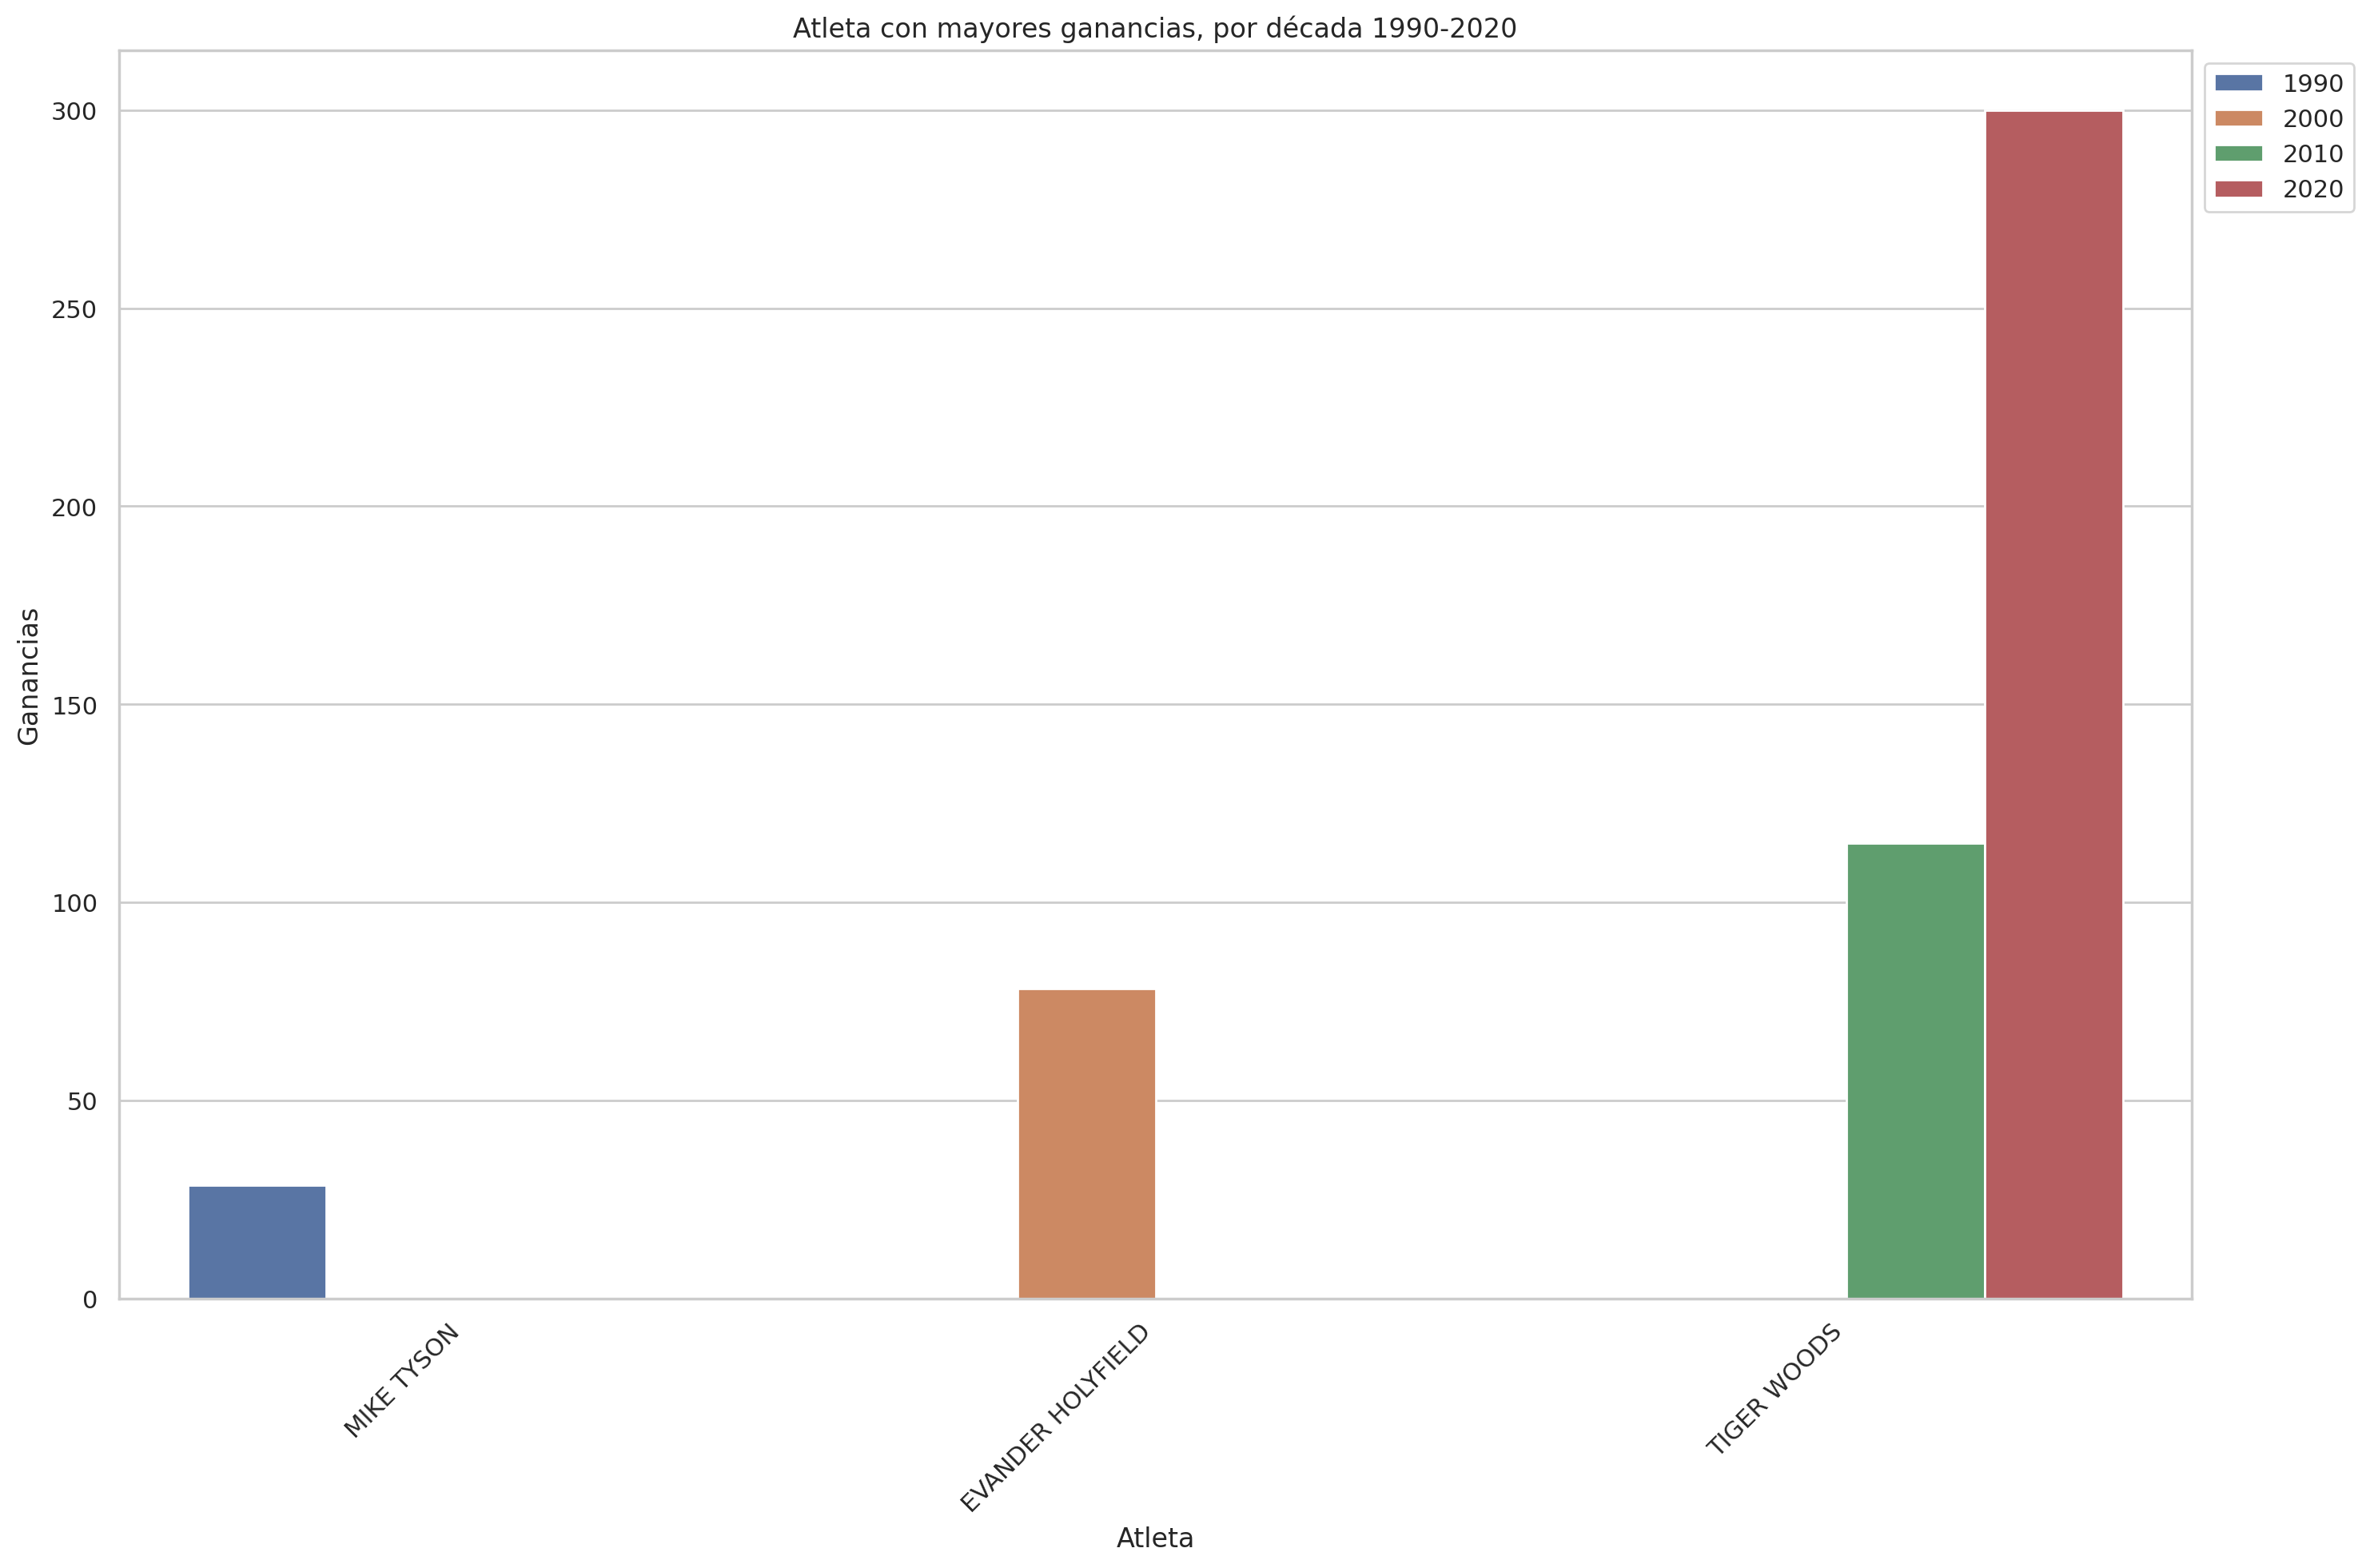

In [505]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='Name', y='earnings ($ million)', data=result, hue=result.index,  palette="deep")


plt.xticks(rotation=45, ha='right')
plt.xlabel('Atleta')
plt.ylabel('Ganancias')
plt.title('Atleta con mayores ganancias, por década 1990-2020')


ax.legend(title='Año')
ax.legend().set_bbox_to_anchor((1, 1))

plt.tight_layout()
plt.show()

## 8.- Ganancia total por cada deporte por cada año.

In [510]:
gananciaAnual = jugForbes.pivot_table(index=jugForbes.index, columns='Sport', values='earnings ($ million)', aggfunc='sum')

<Figure size 10000x10000 with 0 Axes>

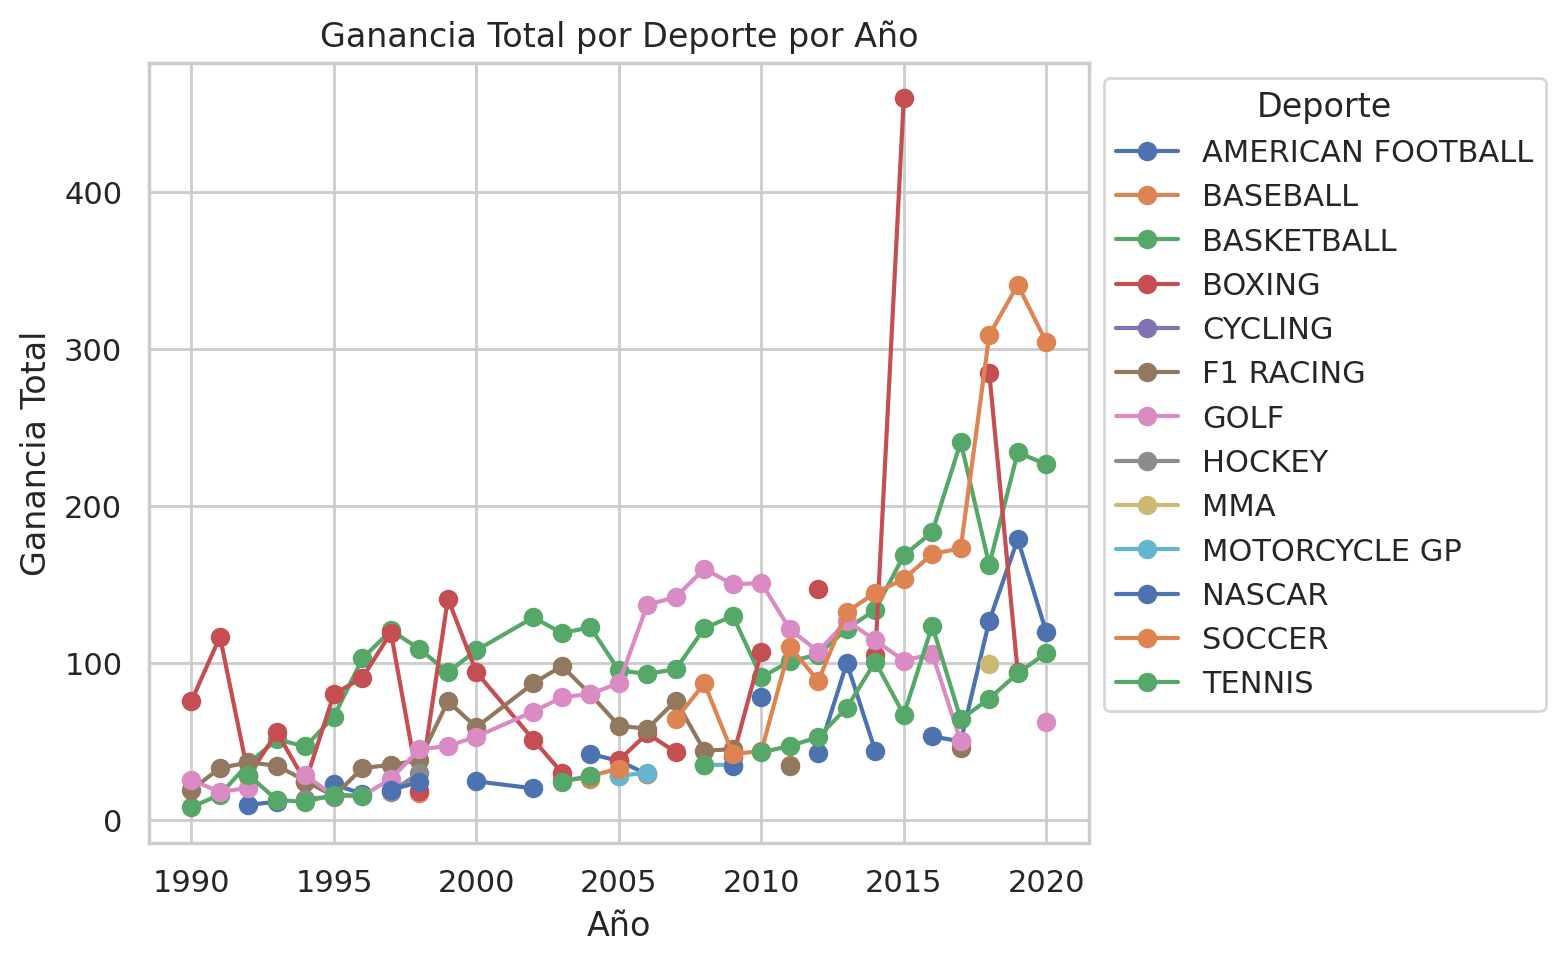

In [518]:
# Crear la gráfica de líneas
plt.figure(figsize=(100, 100))  # Ajustar el tamaño de la figura si es necesario
gananciaAnual.plot(kind='line', marker='o')

# Configurar el título y las etiquetas de los ejes
plt.title('Ganancia Total por Deporte por Año')
plt.xlabel('Año')
plt.ylabel('Ganancia Total')

# Mostrar la leyenda
plt.legend(title='Deporte', bbox_to_anchor=(1, 1))

# Mostrar la gráfica
plt.tight_layout()
plt.show()